In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [2]:
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution

In [3]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.2)
belief_distribution = BeliefDistribution(unique, linespace)
network = ArtificialNetwork(200, "stochastic_block_model")
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
insights = Insights(["diversity", "disagreement"])
simulation = Simulation(1000, insights)
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
update_rule = UpdateRule(evaluation_bias=0.3, assimilation_bias=0, rewire_probability=1)
agent_network.set_extreme_agents(0.02, 50, 50)
interactions = Interactions(update_rule, interaction_rate=1, interacting_agents=True)

In [4]:
results = []
assimilation_biases = [0, 0.005, 0.01, 0.05, 0.1]
for assimilation_bias in assimilation_biases:
    interactions.update_rule.assimilation_bias = assimilation_bias
    simulation.run(interactions, agent_network)
    results.append(simulation.insights.belief_evolution)

Progress: 100%|██████████| 1000/1000 [00:07<00:00, 134.02it/s]


/var/folders/qj/5zmtfh2n12qb00h_8gwh8zhh0000gn/T/ipykernel_20523/3824824959.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


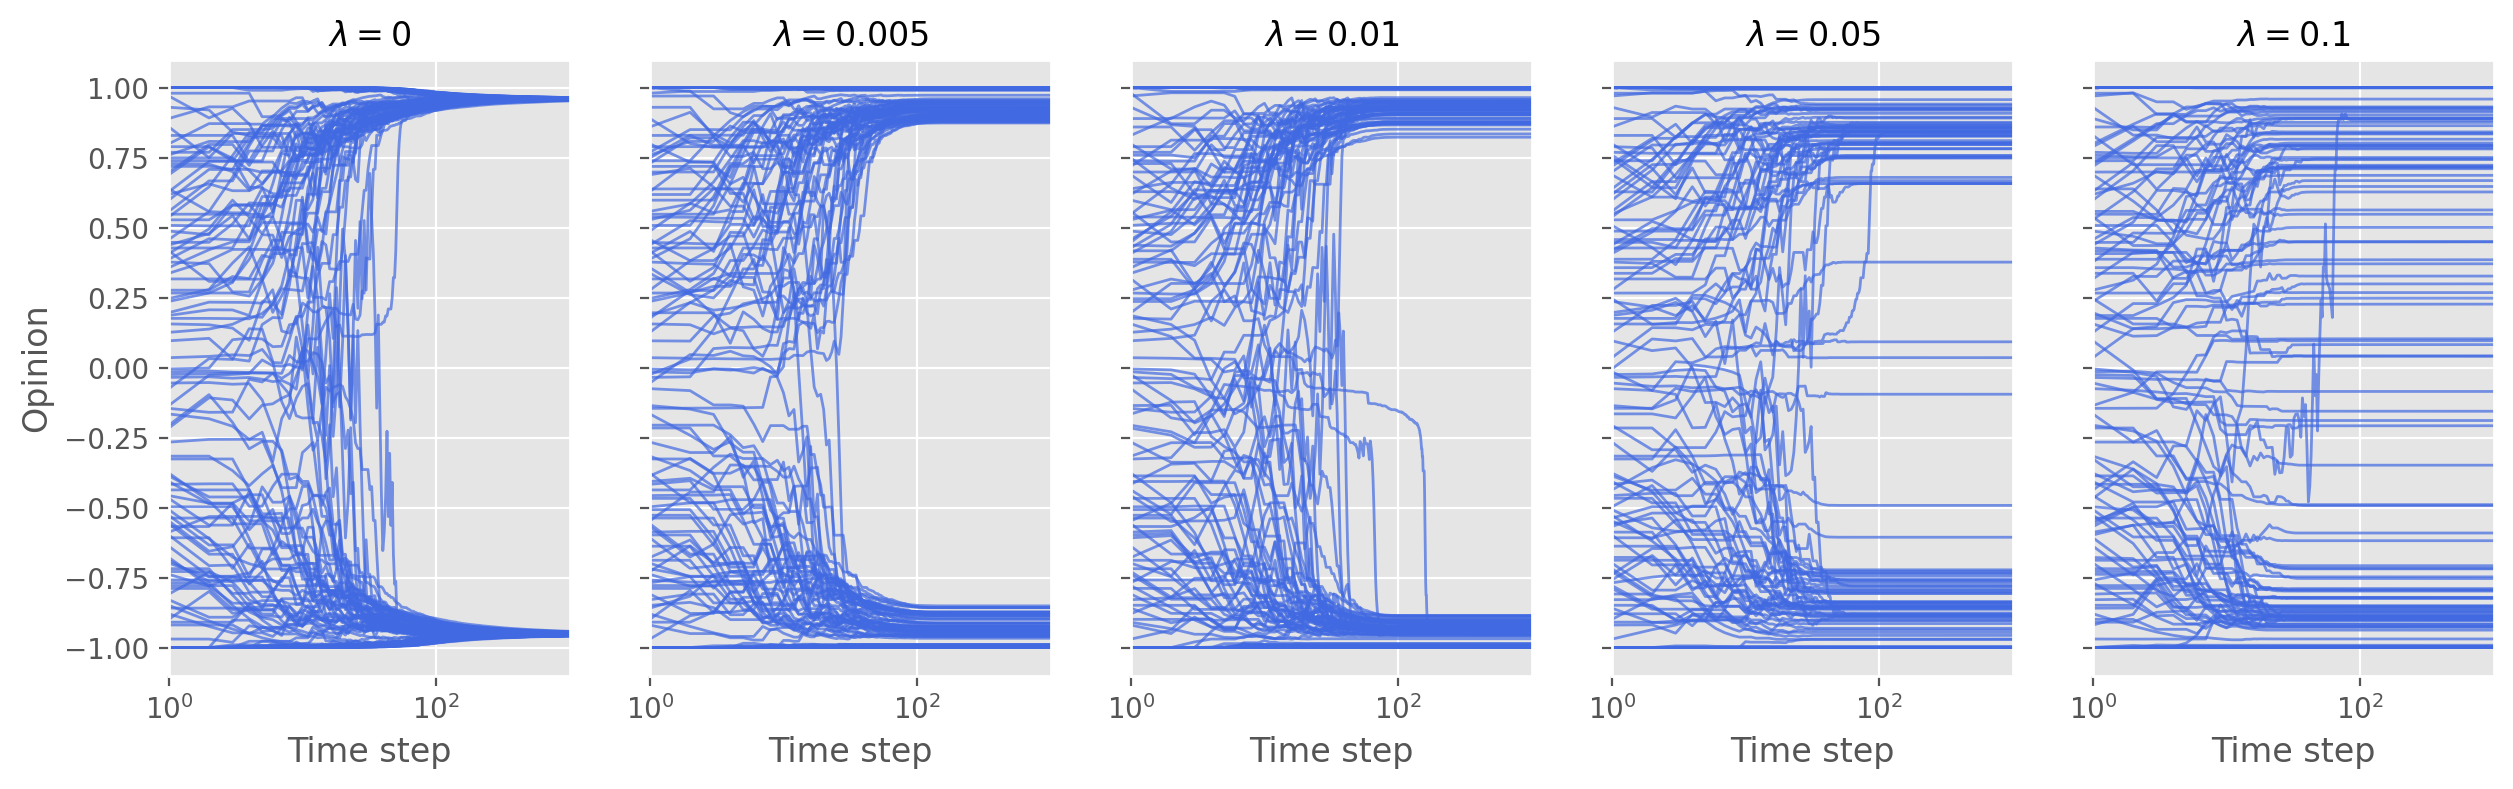

In [5]:
y_num = len(results)
fig, axs = plt.subplots(1, y_num, sharex=True, sharey=True, figsize=(15, 4))
cols = [r'$\lambda = {}$'.format(col) for col in assimilation_biases]
for i in range(y_num):
    ax_plot_belief_evolution(results[i], axs[i])

pad = 5 
for ax, col in zip(axs, cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')

for ax in axs.flat:
    ax.set(xlabel='Time step', ylabel='Opinion')
    
for ax in axs.flat:
    ax.label_outer()
fig.show()

/Users/martinprieto/Desktop/myproject/src/plotting/basic.py:84: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  return ax.imshow(histogram.T, aspect="auto", interpolation=interpolation , vmax=np.quantile(histogram, qmax))
/var/folders/qj/5zmtfh2n12qb00h_8gwh8zhh0000gn/T/ipykernel_20523/918671180.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


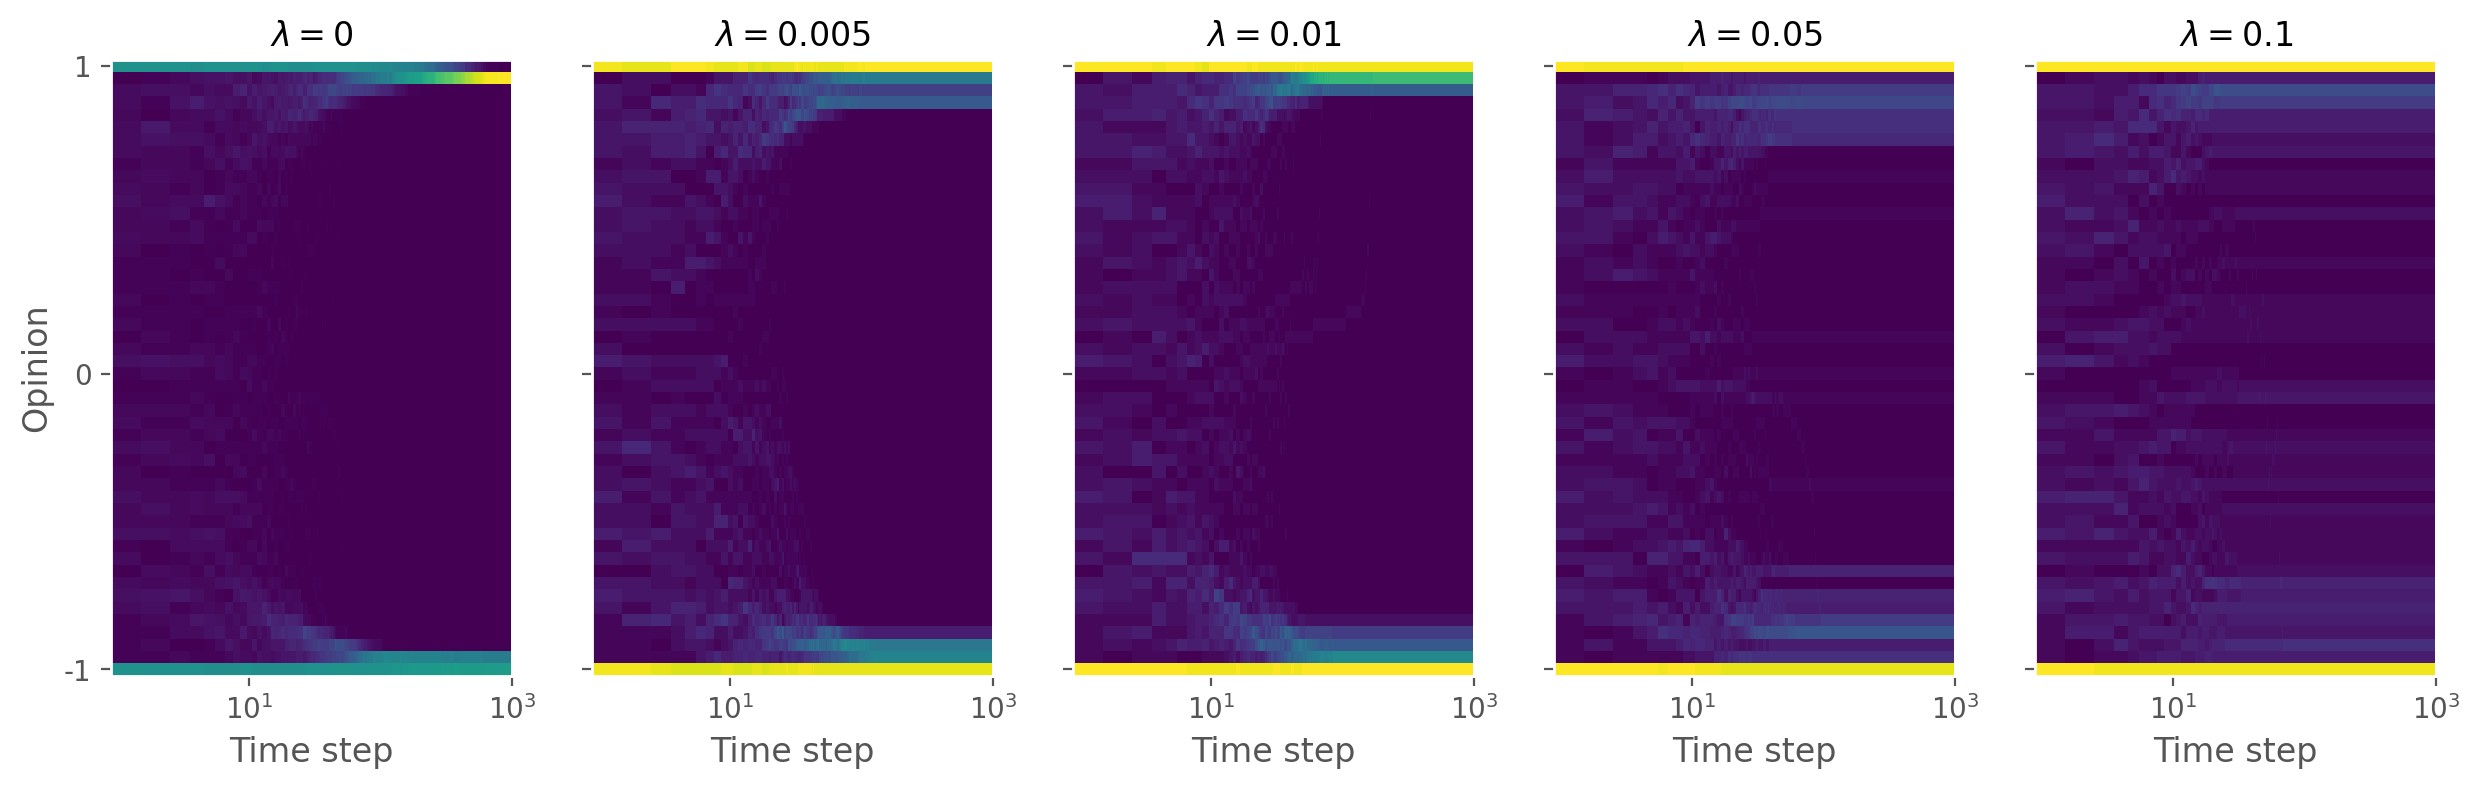

In [6]:
y_num = len(results)
fig, axs = plt.subplots(1, y_num, sharex=True, sharey=True, figsize=(15, 4))
cols = [r'$\lambda = {}$'.format(col) for col in assimilation_biases]
for i in range(y_num):
    ax_plot_density_of_opinions(results[i], axs[i])

pad = 5 
for ax, col in zip(axs, cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')

for ax in axs.flat:
    ax.set(xlabel='Time step', ylabel='Opinion')
    
for ax in axs.flat:
    ax.label_outer()
fig.show()